In [3]:
from guardrails import Guard, install

VALIDATOR_NAME="ToxicLanguage"
VALIDATOR_URI="hub://guardrails/toxic_language"
kwargs = {}



ValidatorInstall = install(VALIDATOR_URI, quiet=True, install_local_models=True)

Installing hub://guardrails/toxic_language...

/home/zayd/workspace/validator-benchmarks/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


✅Successfully installed guardrails/toxic_language!

In [4]:
Validator = ValidatorInstall.__getattribute__(VALIDATOR_NAME)

In [24]:
import time

input_lengths = []
local_latencies = []
remote_latencies = []

local_validation = Guard().use(Validator(
    use_local=True,
    **kwargs
))


remote_validator = Validator(
    use_local=False,
    **kwargs
)
remote_validation = Guard().use(remote_validator)

# Run local validation for each line in data.csv
with open("./data.csv") as f:
    for line in f:
        start = time.time()  
        local_validation.validate(line)
        local_latency = time.time() - start

        remote_start = time.time()
        remote_validation.validate(line)
        remote_latency = time.time() - remote_start

        input_lengths.append(len(line))
        local_latencies.append(local_latency)
        remote_latencies.append(remote_latency)

    f.close()


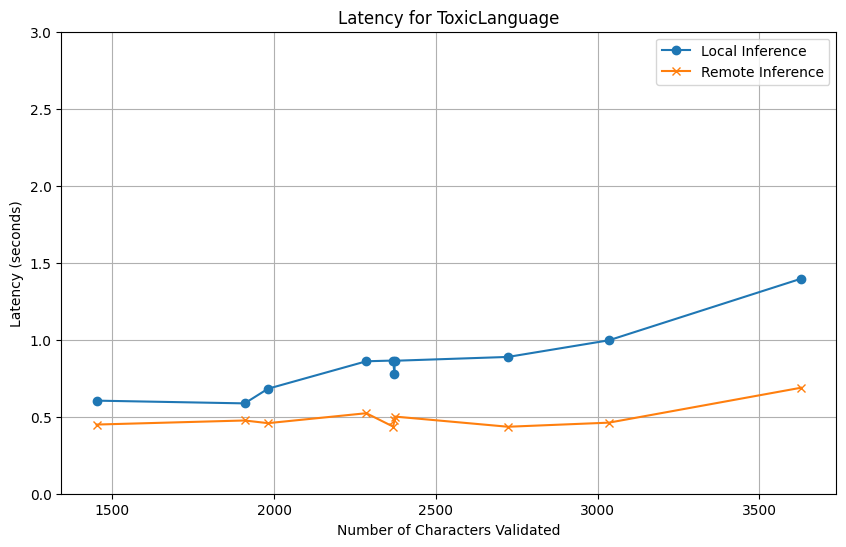

In [25]:
import matplotlib.pyplot as plt

zipped = zip(input_lengths, local_latencies, remote_latencies)
zipped = sorted(zipped, key=lambda x: x[0])
input_lengths, local_latencies, remote_latencies = zip(*zipped)

plt.figure(figsize=(10, 6))
plt.plot(input_lengths, local_latencies, label='Local Inference', marker='o')
plt.plot(input_lengths, remote_latencies, label='Remote Inference', marker='x')
plt.xlabel('Number of Characters Validated')
plt.ylabel('Latency (seconds)')
plt.title(f'Latency for {VALIDATOR_NAME}')
plt.legend()
plt.grid(True)
plt.ylim(0, 3)  # Fixed y-axis limit for better visibility
plt.show()